<a href="https://colab.research.google.com/github/neha702/Fakenews-detector/blob/main/Fake_news_detector(using_logistic_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install -U scikit-learn

In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.0.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import csv
import sys
csv.field_size_limit(sys.maxsize)  #so as to increase the size of csv field
train_data=pd.read_csv('/content/train.csv',engine='python',error_bad_lines=False)
test_data=pd.read_csv('/content/test.csv')
print(train_data)
print(train_data.shape)

          id  ... label
0          0  ...     1
1          1  ...     0
2          2  ...     1
3          3  ...     1
4          4  ...     1
...      ...  ...   ...
20795  20795  ...     0
20796  20796  ...     0
20797  20797  ...     0
20798  20798  ...     1
20799  20799  ...     1

[20800 rows x 5 columns]
(20800, 5)


In [ ]:
train_data.isnull().sum()
train_data=train_data.fillna('')
train_data.isnull().sum()
test_data.isnull().sum()
test_data=test_data.fillna('')
test_data.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

**Text preprocessing**

In [ ]:
#Remove punctuations
import re
import nltk
nltk.download("punkt") #Download punkt tokenizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

stop_words=stopwords.words('english')
for rows in range(0,20800,1):
     tokens=''
     sentence=train_data.loc[rows,'title']
     sentence=re.sub(r'[^\w\s]','',sentence)   #Remove punctuations 
     words =  nltk.word_tokenize(sentence) #Tokenize words and remove non-letters
     words=[w for w in words if not w in stop_words] #Remove stop words
     for w in words:
        tokens=tokens+' '+str(lemmatizer.lemmatize(w)).lower() #Lemmatization
     train_data.loc[rows,'total']=tokens  #Make a column for the processed words of title column

In [ ]:
train_data=train_data.iloc[:,4:6]
train_data

,label,total
0,1,house dem aide we didnt even see comeys lette...
1,0,flynn hillary clinton big woman campus breitbart
2,1,why truth might get you fired
3,1,15 civilians killed in single us airstrike ha...
4,1,iranian woman jailed fictional unpublished st...
...,...,...
20795,0,rapper ti trump poster child for white supremacy
20796,0,nfl playoffs schedule matchups odds the new y...
20797,0,macys is said receive takeover approach hudso...
20798,1,nato russia to hold parallel exercises in bal...


In [ ]:
X=train_data.iloc[:,1]
Y=train_data.iloc[:,0]
print(X)
print(Y)

0         house dem aide we didnt even see comeys lette...
1         flynn hillary clinton big woman campus breitbart
2                            why truth might get you fired
3         15 civilians killed in single us airstrike ha...
4         iranian woman jailed fictional unpublished st...
                               ...                        
20795     rapper ti trump poster child for white supremacy
20796     nfl playoffs schedule matchups odds the new y...
20797     macys is said receive takeover approach hudso...
20798     nato russia to hold parallel exercises in bal...
20799                                 what keeps f35 alive
Name: total, Length: 20800, dtype: object
0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


In [ ]:
X_spare=train_data.iloc[:,1]
X_spare


0         house dem aide we didnt even see comeys lette...
1         flynn hillary clinton big woman campus breitbart
2                            why truth might get you fired
3         15 civilians killed in single us airstrike ha...
4         iranian woman jailed fictional unpublished st...
                               ...                        
20795     rapper ti trump poster child for white supremacy
20796     nfl playoffs schedule matchups odds the new y...
20797     macys is said receive takeover approach hudso...
20798     nato russia to hold parallel exercises in bal...
20799                                 what keeps f35 alive
Name: total, Length: 20800, dtype: object

**Applying NLP techniques**

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer=CountVectorizer()
count_vectorizer.fit_transform(X)
freq_term_matrix=count_vectorizer.transform(X)
tfidf=TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix=tfidf.fit_transform(freq_term_matrix)

In [ ]:
tf_idf_matrix.toarray().shape

(20800, 24653)

**Test set**

In [ ]:
test_data.shape

(5200, 4)

In [ ]:
stop_words=stopwords.words('english')
for rows in range(0,5200,1):
     tokens=''
     sentence=test_data.loc[rows,'title']
     sentence=re.sub(r'[^\w\s]','',sentence)   #Remove punctuations 
     words =  nltk.word_tokenize(sentence) #Tokenize words and remove non-letters
     words=[w for w in words if not w in stop_words] #Remove stop words
     for w in words:
        tokens=tokens+' '+str(lemmatizer.lemmatize(w)).lower() #Lemmatization
     test_data.loc[rows,'total']=tokens  #Make a column for the processed words of title column

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(tf_idf_matrix,Y,test_size=0.2,random_state=0)


**Modelling**

0.7710926828636719


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


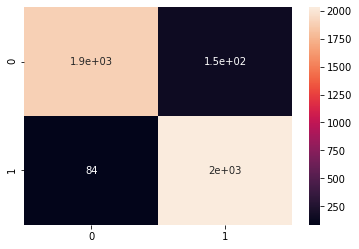

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
regressor=LogisticRegression(C=1e5)
regressor.fit(X_train,Y_train)
y_pred=regressor.predict(X_test)
accuracy=r2_score(Y_test,y_pred)
print(accuracy)
cm=confusion_matrix(Y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
test_counts=count_vectorizer.transform(test_data['total'].values)
test_tfidf=tfidf.transform(test_counts)

In [ ]:
y_total_pred=regressor.predict(test_tfidf)
y_total_pred=pd.DataFrame(y_total_pred)
y_total_pred.columns=['Labels'] #To add header name

In [ ]:
y_total_pred

,Labels
0,0
1,1
2,1
3,0
4,0
...,...
5195,0
5196,0
5197,0
5198,1


In [ ]:
y_total_pred.to_csv('submission.csv',index=False)

**Pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model

In [ ]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [ ]:
pipeline.fit(X_spare,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])

In [ ]:
pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

array([1])

In [ ]:
filename='pipeline.sav'
joblib.dump(pipeline,filename)

['pipeline.sav']

In [ ]:
filename='./pipeline.sav'

In [ ]:
loaded_model=joblib.load(filename)
result=loaded_model.predict
result

<function sklearn.pipeline.Pipeline.predict>